In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [37]:
datafr = pd.read_csv('minute_weather.csv', sep = ',')
datafr.dropna()
datafr.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [38]:
data = datafr.filter(['air_pressure', 'air_temp', 'relative_humidity'])

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.dropna(inplace=True)
data.isna().any()
data = np.array(data)

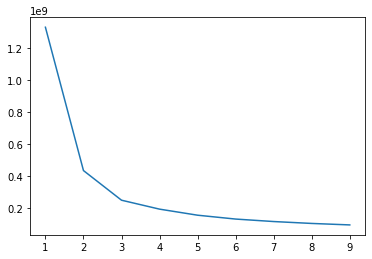

In [39]:
def codo(data, /, *, tested_clusters):
    #y = [KMeans(n_clusters=n).fit(data).inertia_ 
    #for n in tested_clusters]
    y  = []
    for n in tested_clusters:
        model = KMeans(n_clusters=n)
        model.fit(data)
        y.append(model.inertia_)
    plt.plot(tested_clusters, y)
    plt.show()


codo(data, tested_clusters=[x for x in range(1, 10)])

In [40]:
#se seleccionó encontró que el set funcionaba mejor con 2 clusters
model = KMeans(n_clusters=2)
y = model.fit_predict(data)



In [41]:
vals, count = np.unique(y, return_counts=True)
count

array([932857, 654400])

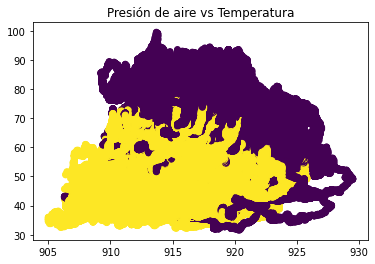

In [42]:
# air_pressure vs air_temp
plt.scatter(data[:,0], data[:, 1], c=y)
plt.title('Presión de aire vs Temperatura')
plt.show()


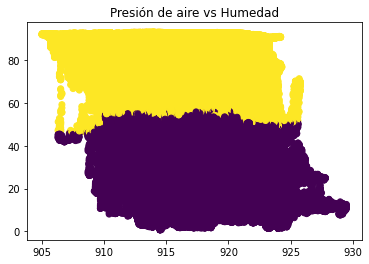

In [43]:
#rain_accumulation vs relative_humidity
plt.scatter(data[:,0], data[:, 2], c=y)
plt.title('Presión de aire vs Humedad')
plt.show()

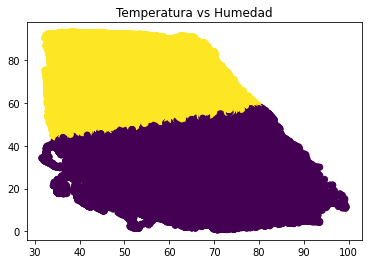

In [44]:
#air_temp vs relative_humidity
plt.scatter(data[:,1], data[:, 2], c=y)
plt.title('Temperatura vs Humedad')
plt.show()

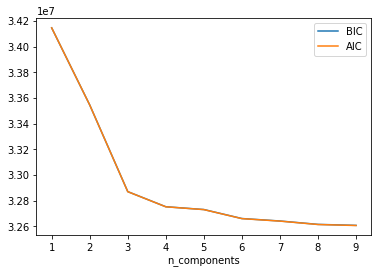

In [45]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

# se recomienda hacer 3 clusters

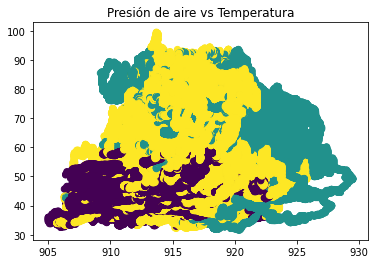

In [46]:
# air_pressure vs air_temp

gmm = GaussianMixture(n_components=3).fit(data)
labels = gmm.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, s=40)
plt.title('Presión de aire vs Temperatura')
plt.show()

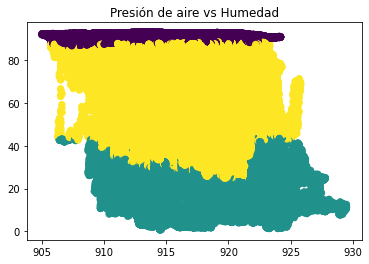

In [47]:
#air_pressure vs relative_humidity
plt.scatter(data[:, 0], data[:, 2], c=labels, s=40)
plt.title('Presión de aire vs Humedad')
plt.show()

Text(0.5, 1.0, 'Temperatura vs Humedad')

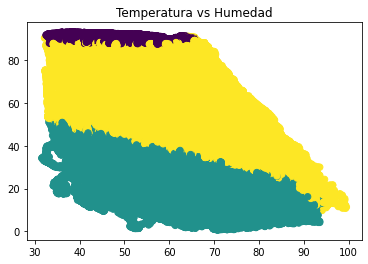

In [48]:
#air_temp vs relative_humidity
plt.scatter(data[:, 1], data[:, 2], c=labels, s=40)
plt.title('Temperatura vs Humedad')